<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Pycaret_MultiClass_Classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret Multiclass Classification

PyCaret is an open-source, low-code machine learning library in Python that streamlines machine learning workflows. It serves as an end-to-end tool for machine learning and model management, significantly speeding up the experimentation cycle and enhancing productivity.

In this section, I will demonstrate multiclass classification along with the requirements for running the code.

### Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret using Python's pip package manager:

```bash
pip install pycaret


In [3]:

# Install PyCaret for machine learning workflows
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [4]:
import pycaret
pycaret.__version__

'3.3.2'

In [8]:
from pycaret.datasets import get_data
import pandas as pd

# Load the Titanic dataset
titanic_data = get_data('titanic')

# Bin the 'fare' column into categories
titanic_data['fare_category'] = pd.cut(titanic_data['Fare'], bins=[0, 30, 100, 600], labels=['Low', 'Medium', 'High'])

# Check the distribution of the new target variable
print(titanic_data['fare_category'].value_counts())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


fare_category
Low       642
Medium    181
High       53
Name: count, dtype: int64


**Setup**

This function sets up the training environment and builds the transformation pipeline. It is essential to call the setup function before using any other PyCaret functions. Only the data and target parameters are mandatory, while the rest are optional.

In [9]:

from pycaret.classification import setup

# Initialize PyCaret setup with the new target variable
titanic_target = setup(titanic_data, target='Survived', session_id=1234)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 13)"
4,Transformed data shape,"(891, 17)"
5,Transformed train set shape,"(623, 17)"
6,Transformed test set shape,"(268, 17)"
7,Numeric features,6
8,Categorical features,6
9,Rows with missing values,79.7%


Once the setup in PyCaret is successfully completed, an information grid is displayed, summarizing key details of the experiment:

Session ID: A pseudo-random seed used for reproducibility. If not specified, one is automatically generated and shared across all functions.

Target Type: Detected automatically as either Binary, Multiclass, or Regression.
Label Encoding: Converts string labels (e.g., 'Yes'/'No') into numeric values (0/1). If the target is already numeric, no encoding is applied.

Original Data Shape: The shape of the dataset before any transformations are applied.

Transformed Train/Test Shape: The shape of the train and test sets after applying transformations.

Numeric Features: The number of features identified as numeric.

Categorical Features: The number of features identified as categorical.
PyCaret offers two types of APIs for you to work with: (1) the Functional API (as illustrated above) and (2) the Object-Oriented API.

In the Object-Oriented API, instead of calling functions directly, you instantiate a class and execute methods from that class.



In [10]:
# Import the ClassificationExperiment class and initialize it
from pycaret.classification import ClassificationExperiment
model_experiment = ClassificationExperiment()

In [12]:
# Check the type of the experiment object
type(model_experiment)


pycaret.classification.oop.ClassificationExperiment

In [14]:

# init setup on exp
model_experiment.setup(titanic_data, target = 'Survived', session_id = 1234)

,Description,Value
0,Session id,1234
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 13)"
4,Transformed data shape,"(891, 17)"
5,Transformed train set shape,"(623, 17)"
6,Transformed test set shape,"(268, 17)"
7,Numeric features,6
8,Categorical features,6
9,Rows with missing values,79.7%


You can work with either the Functional API or the Object-Oriented API in PyCaret, and even switch between the two seamlessly. The method you choose won’t affect the results, as both approaches have been thoroughly tested for consistency.

**Compare Models**

The compare_models function trains and evaluates all the models available in the library using cross-validation. It generates a scoring grid that displays the average performance of each model. You can examine the evaluation metrics used in the cross-validation process with the get_metrics function. Furthermore, you can add or remove custom metrics using the add_metric and remove_metric functions.

In [15]:

# compare baseline models
cmp_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8072,0.8714,0.6946,0.7804,0.7288,0.5815,0.5888,0.9860
ridge,Ridge Classifier,0.7560,0.8661,0.4522,0.8385,0.5820,0.4337,0.4766,0.1420
et,Extra Trees Classifier,0.7463,0.8009,0.4275,0.8298,0.5517,0.4068,0.4526,0.2760
nb,Naive Bayes,0.6693,0.7918,0.1803,0.8452,0.2851,0.1792,0.2698,0.1420
knn,K Neighbors Classifier,0.6275,0.5906,0.3690,0.5175,0.4255,0.1654,0.1713,0.2860
lda,Linear Discriminant Analysis,0.6260,0.5386,0.0348,0.0800,0.0485,0.0335,0.0389,0.1410
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1430
rf,Random Forest Classifier,0.6164,0.8062,0.0042,0.0500,0.0077,0.0018,0.0042,0.5200
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1560
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [16]:
# Compare models using the Object-Oriented API

model_experiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8217,0.8653,0.7074,0.8118,0.7514,0.6140,0.6212,0.4380
ridge,Ridge Classifier,0.7398,0.8501,0.4101,0.8277,0.5439,0.3916,0.4402,0.1410
et,Extra Trees Classifier,0.7061,0.8253,0.2801,0.8541,0.4085,0.2844,0.3626,0.2760
knn,K Neighbors Classifier,0.6644,0.6422,0.4143,0.5820,0.4756,0.2455,0.2546,0.2460
nb,Naive Bayes,0.6579,0.8057,0.1674,0.7422,0.2679,0.1523,0.2224,0.1680
lda,Linear Discriminant Analysis,0.6276,0.5334,0.0348,0.0889,0.0500,0.0368,0.0442,0.1420
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1460
rf,Random Forest Classifier,0.6164,0.8240,0.0000,0.0000,0.0000,0.0000,0.0000,0.3180
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2820
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

It is important to note that the output is consistent between the Functional and Object-Oriented APIs. The remaining functions in this notebook will be demonstrated using the Functional API only.

**Analyze Model**

To analyze the performance of a trained model on the test set, we can use the plot_model function. In some cases, this may necessitate re-training the model; however, in this instance, we already have the trained model available.

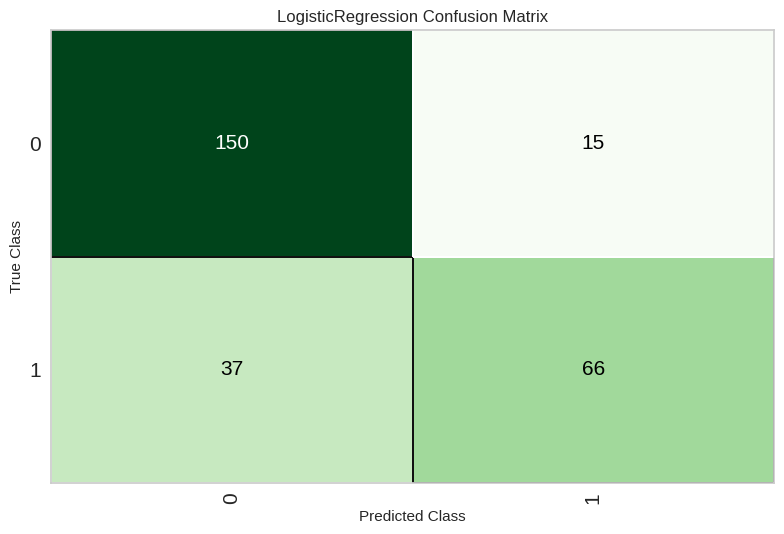

In [17]:
# Plot Confusion Matrix:
# A confusion matrix visually represents the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.
plot_model(cmp_model, plot = 'confusion_matrix')

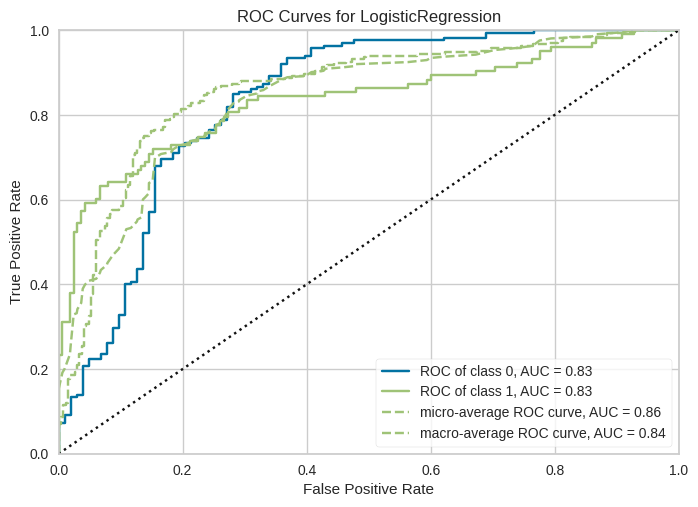

In [18]:

# plot AUC -> (Area Under the Curve) graph
plot_model(cmp_model, plot = 'auc')

In [19]:
## The evaluate_model function provides interactive visualizations of different performance metrics for the best-performing model in a notebook environment.
evaluate_model(cmp_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Prediction Model**

The predict_model function appends two new columns, prediction_label and prediction_score (representing the probability of the predicted class), to the dataframe. If no data is specified (default behavior), it uses the test set generated during the setup phase for making predictions

In [20]:
# predict on test set
test_results = predict_model(cmp_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8060,0.8347,0.6408,0.8148,0.7174,0.5729,0.5824


In [21]:
# Display the predictions dataframe
test_results.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,Survived,prediction_label,prediction_score
178,179,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.000000,NaN,S,Low,0,0,0.7783
457,458,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.862499,D21,S,Medium,1,1,0.8638
16,17,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125000,NaN,Q,Low,0,0,0.9108
95,96,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.050000,NaN,S,Low,0,0,0.8638
120,121,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.500000,NaN,S,Medium,0,0,0.7616


The same function can be used to predict labels on an unseen dataset. We will create a copy of the original data and remove the default labels. This way, we can utilize the new dataframe without labels for scoring.

In [24]:
# Create a copy of the data and remove the Class variable

New_data_set = titanic_data.copy()
New_data_set.drop('Embarked', axis=1, inplace=True)
# Add a placeholder for 'Embarked'
New_data_set['Embarked'] = '-NA'
New_data_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,fare_category,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Low,-NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Medium,-NA
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Low,-NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Medium,-NA
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Low,-NA


In [25]:
# predict model on new_data
predictions = predict_model(cmp_model, data = New_data_set)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8878,0.9554,0.8450,0.8601,0.8525,0.7619,0.7620


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,fare_category,Embarked,Survived,prediction_label,prediction_score
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,Low,-NA,0,0,0.8982
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,Medium,-NA,1,1,0.9619
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,Low,-NA,1,1,0.8564
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,Medium,-NA,1,1,0.9620
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,Low,-NA,0,0,0.8406


**Save Model**

To conclude, we can save the entire pipeline to disk for future use by utilizing PyCaret's save_model function.

In [26]:

# save pipeline
save_model(cmp_model, 'second_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PassengerId', 'Pclass', 'Age',
                                              'SibSp', 'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None...
                                                               handle_unknown='value',
                                            

In [27]:
# Load pipeline
best_pipeline_model = load_model('second_pipeline')
best_pipeline_model


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['PassengerId', 'Pclass', 'Age',
                                             'SibSp', 'Parch', 'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(e...
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)